<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D_%EC%9C%A0%EB%AA%85%EC%9D%B8_%EC%9D%B8%EC%8B%9D(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow # 사진처리
pip install requests # 인터넷 처리

SyntaxError: ignored

In [ ]:
pip install requests

In [ ]:
pip install pillow

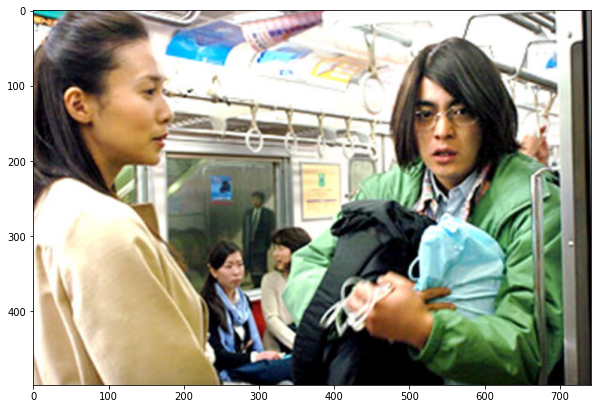

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('ota.png')

plt.figure(figsize=(10,8))
plt.imshow(img)

In [ ]:
pip install requests


In [ ]:

import requests  # 사진 전송을 위해서 requests

client_id = "JtzyEv6hdzG2mhfewvFn"
client_secret = "b7VOpgnzec"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('ota.png','rb')}

headers = {"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}

response = requests.post(url,files=files, headers=headers)

In [ ]:
import json

parsed = json.loads(response.text)

print (parsed)
print (json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

# json.dumps 를 이용하면 보기 좋게 변환해준다. 들여쓰기 까지 정리한다. 
# ensure_ascii=False 한글 제대로 보기 

{'info': {'size': {'width': 742, 'height': 498}, 'faceCount': 5}, 'faces': [{'celebrity': {'value': '이세창', 'confidence': 0.530317}}, {'celebrity': {'value': '윤손하', 'confidence': 0.10376}}, {'celebrity': {'value': '예지원', 'confidence': 0.06814}}, {'celebrity': {'value': '박보영', 'confidence': 0.01}}, {'celebrity': {'value': '박병호', 'confidence': 0.01}}]}
{
    "info": {
        "size": {
            "width": 742,
            "height": 498
        },
        "faceCount": 5
    },
    "faces": [
        {
            "celebrity": {
                "value": "이세창",
                "confidence": 0.530317
            }
        },
        {
            "celebrity": {
                "value": "윤손하",
                "confidence": 0.10376
            }
        },
        {
            "celebrity": {
                "value": "예지원",
                "confidence": 0.06814
            }
        },
        {
            "celebrity": {
                "value": "박보영",
                "confidence": 0.01
     

In [ ]:
import requests  # 사진 전송을 위해서 requests

client_id = "JtzyEv6hdzG2mhfewvFn"
client_secret = "b7VOpgnzec"

url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('ota.png','rb')}

headers = {"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}

response = requests.post(url,files=files, headers=headers)

In [ ]:
import json

result = json.loads(response.text)



In [ ]:
result.keys()

dict_keys(['info', 'faces'])

In [ ]:
result['faces']

[{'age': {'confidence': 0.677037, 'value': '38~42'},
  'emotion': {'confidence': 0.573306, 'value': 'talking'},
  'gender': {'confidence': 0.99967, 'value': 'male'},
  'landmark': {'leftEye': {'x': 524, 'y': 135},
   'leftMouth': {'x': 530, 'y': 191},
   'nose': {'x': 544, 'y': 163},
   'rightEye': {'x': 569, 'y': 131},
   'rightMouth': {'x': 565, 'y': 191}},
  'pose': {'confidence': 0.983492, 'value': 'frontal_face'},
  'roi': {'height': 99, 'width': 99, 'x': 503, 'y': 107}},
 {'age': {'confidence': 0.0916257, 'value': '27~31'},
  'emotion': {'confidence': 0.997458, 'value': 'neutral'},
  'gender': {'confidence': 0.921452, 'value': 'female'},
  'landmark': None,
  'pose': {'confidence': 0.966625, 'value': 'right_face'},
  'roi': {'height': 113, 'width': 113, 'x': 83, 'y': 83}},
 {'age': {'confidence': 0.47036, 'value': '21~25'},
  'emotion': {'confidence': 0.972871, 'value': 'neutral'},
  'gender': {'confidence': 0.998387, 'value': 'female'},
  'landmark': None,
  'pose': {'confidence

In [ ]:
result['faces'][0]

{'age': {'confidence': 0.677037, 'value': '38~42'},
 'emotion': {'confidence': 0.573306, 'value': 'talking'},
 'gender': {'confidence': 0.99967, 'value': 'male'},
 'landmark': {'leftEye': {'x': 524, 'y': 135},
  'leftMouth': {'x': 530, 'y': 191},
  'nose': {'x': 544, 'y': 163},
  'rightEye': {'x': 569, 'y': 131},
  'rightMouth': {'x': 565, 'y': 191}},
 'pose': {'confidence': 0.983492, 'value': 'frontal_face'},
 'roi': {'height': 99, 'width': 99, 'x': 503, 'y': 107}}

In [ ]:
result['faces'][0]['roi']

{'height': 99, 'width': 99, 'x': 503, 'y': 107}

In [ ]:
result['faces'][0]['gender']

{'confidence': 0.99967, 'value': 'male'}

In [ ]:
result['faces'][0]['age']

{'confidence': 0.677037, 'value': '38~42'}

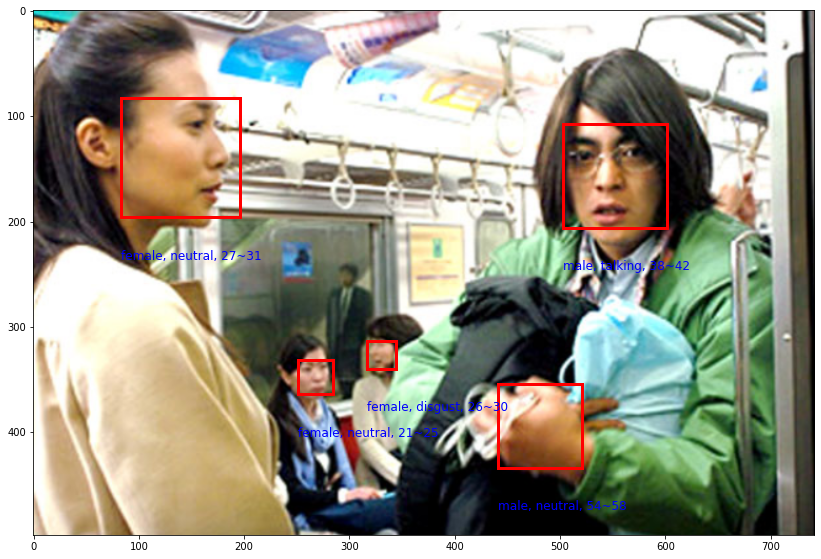

In [ ]:
import matplotlib.patches as patches

img = mpimg.imread('ota.png')
fig,ax = plt.subplots(figsize = (14,10))
ax.imshow(img)
for each in result['faces'] : # 사진의 인원수 faces 만큼 반복
  x, y, w, h = each['roi'].values()
  gender, gen_conf = each['gender'].values()
  emotion , emo_conf = each['emotion'].values()
  age, age_conf = each['age'].values()

  rect_face = patches.Rectangle((x,y),w,h, linewidth=3,
                                edgecolor='r',facecolor='none')
  ant_letter = gender + ', ' + emotion + ', ' + age
  plt.text(x, y+h+40, ant_letter, size=12, color = 'blue')
  ax.add_patch(rect_face)